<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-LCC/blob/main/Notebooks/P02-SVD_Espacios_Latentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/gmauricio-toledo/NLP-LCC/main/Archivos/MovieRatings.xlsx"
df = pd.read_excel(url)
df.head()


,Unnamed: 0,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,BALDERRAMA DOMINGUEZ GAEL,8,9,9,10,9,8.0,10.0,9.0,10.0,...,7.0,10.0,9.0,10.0,NaN,8.0,NaN,NaN,8.0,10.0
1,CASTRO LERMA MARIO ALEJANDRO,9,9,9,9,9,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DURAZO BARTOLINI ANGEL DAVID,10,8,10,10,8,8.0,10.0,9.0,9.0,...,1.0,10.0,NaN,NaN,10.0,1.0,5.0,NaN,NaN,NaN
3,FLORES ALVAREZ CHRISTIAN ALEXIS,10,8,10,10,9,7.0,10.0,8.0,10.0,...,9.0,10.0,8.0,NaN,10.0,3.0,NaN,NaN,NaN,NaN
4,FLORES BRIONES JESUS ANTONIO,10,8,5,7,8,6.0,7.0,7.0,7.0,...,8.0,10.0,8.0,10.0,10.0,7.0,10.0,7.0,10.0,9.0


In [ ]:
nombres = list(df.iloc[:,0].values)
movies = df.iloc[:,1:].columns.to_list()
print(nombres)
print(movies)

['BALDERRAMA DOMINGUEZ GAEL ', 'CASTRO LERMA MARIO ALEJANDRO ', 'DURAZO BARTOLINI ANGEL DAVID ', 'FLORES ALVAREZ CHRISTIAN ALEXIS ', 'FLORES BRIONES JESUS ANTONIO ', 'GARCIA RUIZ JUAN DANIEL ', 'GONZALEZ ARGUELLES PABLO ANDRES ', 'GUTIERREZ NAVARRO GUSTAVO ', 'HERNANDEZ GUTIERREZ LUIS HIRAM ', 'MELENDEZ RIVERA MANUEL IVAN ', 'MORALES NUÑEZ JOSE ANGEL ', 'NAVA BANDA JUAN ADAN ', 'RAMIREZ RAMIREZ JEHU JONATHAN ', 'RAMIREZ RIOS VICTOR HUGO ', 'ROBLES ROBLES GABRIEL SANTIAGO ']
['Spider-Man (2002)', 'The Avengers (2012)', 'Cars (2006)', 'The Incredibles (2004)', 'Toy Story 3 (2010)', 'Spider-Man: No Way Home (2021)', 'Guardians of the Galaxy (2014)', 'Avengers: Infinity War (2018)', 'Avengers: Endgame (2019)', 'Finding Nemo (2003)', 'Inside Out (2015)', 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Soul (2020)', 'Joker (2019)', 'The Dark Knight (2008)', 'Spider-Man: Into the Spider-Verse (2018)', "Harry Potter and the Sorcerer's Stone (2001)", 'Frozen (2013)', 'Black Pa

In [ ]:
#droppeando la primera coumna con los nombres
df_no_names = df.drop(columns=['Unnamed: 0'])
df_no_names

,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),Finding Nemo (2003),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,8,9,9,10,9,8.0,10.0,9.0,10.0,8,...,7.0,10.0,9.0,10.0,NaN,8.0,NaN,NaN,8.0,10.0
1,9,9,9,9,9,NaN,8.0,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,8,10,10,8,8.0,10.0,9.0,9.0,9,...,1.0,10.0,NaN,NaN,10.0,1.0,5.0,NaN,NaN,NaN
3,10,8,10,10,9,7.0,10.0,8.0,10.0,8,...,9.0,10.0,8.0,NaN,10.0,3.0,NaN,NaN,NaN,NaN
4,10,8,5,7,8,6.0,7.0,7.0,7.0,6,...,8.0,10.0,8.0,10.0,10.0,7.0,10.0,7.0,10.0,9.0
5,8,8,10,10,9,7.0,NaN,9.0,9.0,7,...,NaN,NaN,NaN,8.0,10.0,8.0,NaN,7.0,8.0,10.0
6,7,8,8,9,7,NaN,9.0,NaN,NaN,8,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
7,10,7,7,8,9,6.0,9.0,8.0,8.0,9,...,7.0,NaN,NaN,10.0,9.0,8.0,5.0,3.0,9.0,9.0
8,7,8,9,8,8,NaN,8.0,8.0,9.0,9,...,8.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8,8,9,9,6,7.0,9.0,9.0,5.0,9,...,8.0,10.0,7.0,8.0,10.0,7.0,10.0,4.0,NaN,9.0


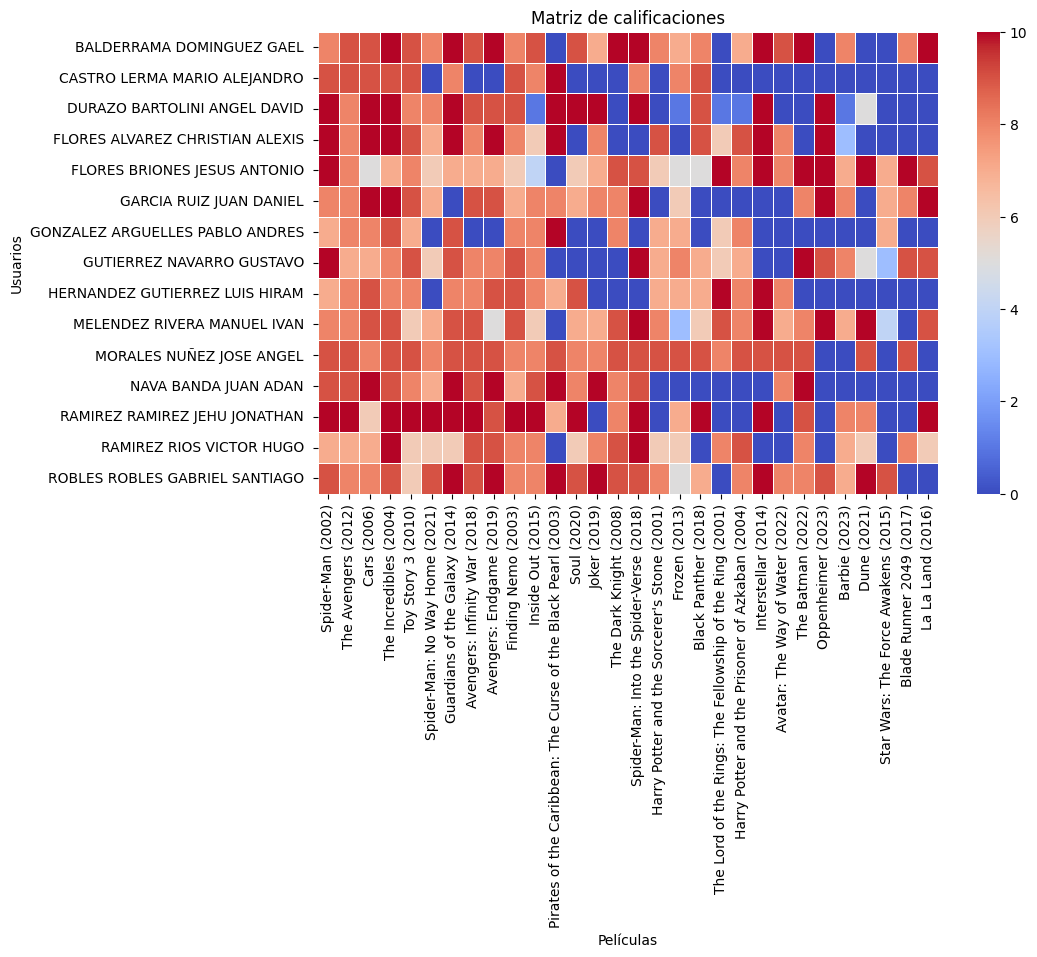

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_aux = df_no_names.replace(np.nan,0)
plt.figure(figsize=(10, 6))
sns.heatmap(df_aux, cmap='coolwarm', linewidths=0.5,yticklabels=nombres)
plt.title('Matriz de calificaciones')
plt.xlabel('Películas')
plt.ylabel('Usuarios')
plt.show()

## Imputación

In [ ]:
#Utilizando simple imputer para los datos faltantes
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_no_names), columns=df_no_names.columns)
df_imputed

,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),Finding Nemo (2003),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,8.0,9.0,9.0,10.0,9.0,8.0,10.0,9.0,10.0,8.0,...,7.0,10.0,9.0,10.0,0.0,8.0,0.0,0.0,8.0,10.0
1,9.0,9.0,9.0,9.0,9.0,0.0,8.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,8.0,10.0,10.0,8.0,8.0,10.0,9.0,9.0,9.0,...,1.0,10.0,0.0,0.0,10.0,1.0,5.0,0.0,0.0,0.0
3,10.0,8.0,10.0,10.0,9.0,7.0,10.0,8.0,10.0,8.0,...,9.0,10.0,8.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0
4,10.0,8.0,5.0,7.0,8.0,6.0,7.0,7.0,7.0,6.0,...,8.0,10.0,8.0,10.0,10.0,7.0,10.0,7.0,10.0,9.0
5,8.0,8.0,10.0,10.0,9.0,7.0,0.0,9.0,9.0,7.0,...,0.0,0.0,0.0,8.0,10.0,8.0,0.0,7.0,8.0,10.0
6,7.0,8.0,8.0,9.0,7.0,0.0,9.0,0.0,0.0,8.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
7,10.0,7.0,7.0,8.0,9.0,6.0,9.0,8.0,8.0,9.0,...,7.0,0.0,0.0,10.0,9.0,8.0,5.0,3.0,9.0,9.0
8,7.0,8.0,9.0,8.0,8.0,0.0,8.0,8.0,9.0,9.0,...,8.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.0,8.0,9.0,9.0,6.0,7.0,9.0,9.0,5.0,9.0,...,8.0,10.0,7.0,8.0,10.0,7.0,10.0,4.0,0.0,9.0


## Singular Value Decomposition

In [ ]:
#Haciendo truncatedSVD con n_components < #peliculas
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
X_transformed = svd.fit_transform(df_imputed)
print(f"Matriz individuos-componentes latentes: {X_transformed.shape}")

Matriz individuos-componentes latentes: (15, 5)


In [ ]:
#Matriz components_
components = svd.components_.T
print(f"Matriz componentes-peliculas: {components.shape}")

Matriz componentes-peliculas: (30, 5)


## Máxima afinidad

In [ ]:
from numpy import argmax

x_arg = argmax(X_transformed, axis=1)
print(x_arg.shape)
x_arg

(15,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

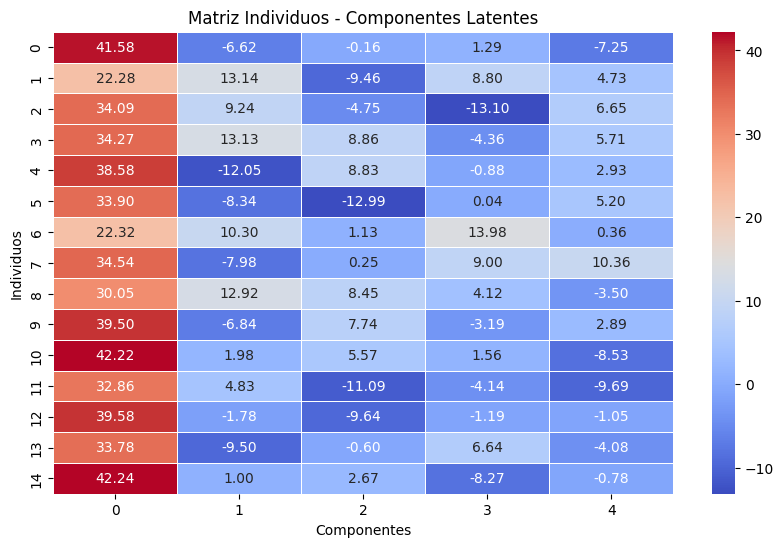

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(X_transformed, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz Individuos - Componentes Latentes')
plt.xlabel('Componentes')
plt.ylabel('Individuos')
plt.show()

In [ ]:
#aplicandosela a components
components_arg = argmax(components, axis=1)
components_arg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 3, 1, 2, 2, 2,
       2, 0, 4, 4, 2, 4, 3, 4])

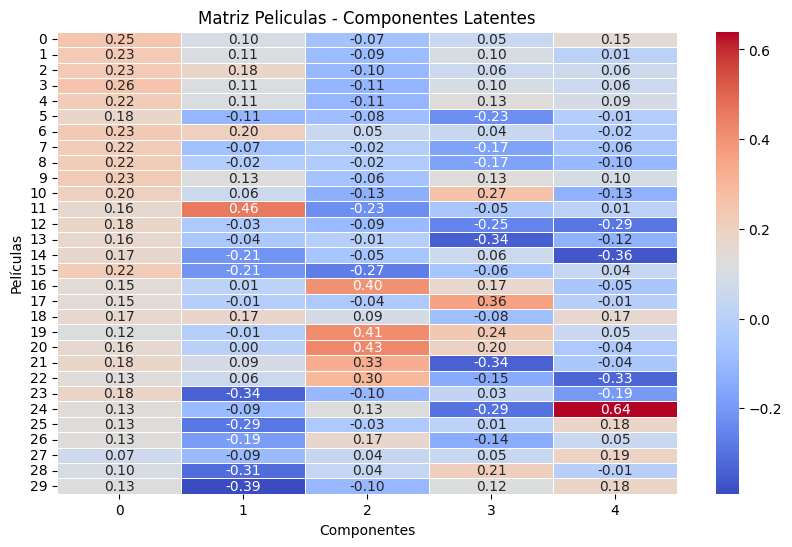

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(components, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz Peliculas - Componentes Latentes')
plt.xlabel('Componentes')
plt.ylabel('Películas')
plt.show()

## Peliculas agrupadas por grupos

In [ ]:
for j in range(X_transformed.shape[1]):
    movie_idxs = np.where(components_arg==j)[0]
    print(f"Grupo {j+1}:")
    for idx in movie_idxs:
        print(f"\t{movies[idx]}")

Grupo 1:
	Spider-Man (2002)
	The Avengers (2012)
	Cars (2006)
	The Incredibles (2004)
	Toy Story 3 (2010)
	Spider-Man: No Way Home (2021)
	Guardians of the Galaxy (2014)
	Avengers: Infinity War (2018)
	Avengers: Endgame (2019)
	Finding Nemo (2003)
	Soul (2020)
	Joker (2019)
	The Dark Knight (2008)
	Spider-Man: Into the Spider-Verse (2018)
	The Batman (2022)
Grupo 2:
	Pirates of the Caribbean: The Curse of the Black Pearl (2003)
	Black Panther (2018)
Grupo 3:
	Harry Potter and the Sorcerer's Stone (2001)
	The Lord of the Rings: The Fellowship of the Ring (2001)
	Harry Potter and the Prisoner of Azkaban (2004)
	Interstellar (2014)
	Avatar: The Way of Water (2022)
	Dune (2021)
Grupo 4:
	Inside Out (2015)
	Frozen (2013)
	Blade Runner 2049 (2017)
Grupo 5:
	Oppenheimer (2023)
	Barbie (2023)
	Star Wars: The Force Awakens (2015)
	La La Land (2016)


## Embeddings

In [ ]:
individuos_embeddings = X_transformed.copy()
peliculas_embeddings = components.copy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine')
nn.fit(individuos_embeddings)

for j,x in enumerate(nombres):
    distances, indices = nn.kneighbors([individuos_embeddings[j]])
    idx = indices[0][1]
    print(f"Más similar a {x}: {nombres[idx]}")

Más similar a BALDERRAMA DOMINGUEZ GAEL : RAMIREZ RIOS VICTOR HUGO 
Más similar a CASTRO LERMA MARIO ALEJANDRO : GONZALEZ ARGUELLES PABLO ANDRES 
Más similar a DURAZO BARTOLINI ANGEL DAVID : ROBLES ROBLES GABRIEL SANTIAGO 
Más similar a FLORES ALVAREZ CHRISTIAN ALEXIS : HERNANDEZ GUTIERREZ LUIS HIRAM 
Más similar a FLORES BRIONES JESUS ANTONIO : MELENDEZ RIVERA MANUEL IVAN 
Más similar a GARCIA RUIZ JUAN DANIEL : RAMIREZ RAMIREZ JEHU JONATHAN 
Más similar a GONZALEZ ARGUELLES PABLO ANDRES : CASTRO LERMA MARIO ALEJANDRO 
Más similar a GUTIERREZ NAVARRO GUSTAVO : RAMIREZ RIOS VICTOR HUGO 
Más similar a HERNANDEZ GUTIERREZ LUIS HIRAM : FLORES ALVAREZ CHRISTIAN ALEXIS 
Más similar a MELENDEZ RIVERA MANUEL IVAN : FLORES BRIONES JESUS ANTONIO 
Más similar a MORALES NUÑEZ JOSE ANGEL : BALDERRAMA DOMINGUEZ GAEL 
Más similar a NAVA BANDA JUAN ADAN : RAMIREZ RAMIREZ JEHU JONATHAN 
Más similar a RAMIREZ RAMIREZ JEHU JONATHAN : GARCIA RUIZ JUAN DANIEL 
Más similar a RAMIREZ RIOS VICTOR HUGO : BALD

In [ ]:
nn = NearestNeighbors(n_neighbors=5, metric='cosine')
nn.fit(peliculas_embeddings)

for j,x in enumerate(movies):
    distances, indices = nn.kneighbors([peliculas_embeddings[j]])
    idx = indices[0][1]
    print(f"Más similar a {x}: {movies[idx]}")

Más similar a Spider-Man (2002): Finding Nemo (2003)
Más similar a The Avengers (2012): The Incredibles (2004)
Más similar a Cars (2006): The Incredibles (2004)
Más similar a The Incredibles (2004): Toy Story 3 (2010)
Más similar a Toy Story 3 (2010): Finding Nemo (2003)
Más similar a Spider-Man: No Way Home (2021): Avengers: Infinity War (2018)
Más similar a Guardians of the Galaxy (2014): Cars (2006)
Más similar a Avengers: Infinity War (2018): Avengers: Endgame (2019)
Más similar a Avengers: Endgame (2019): Avengers: Infinity War (2018)
Más similar a Finding Nemo (2003): Toy Story 3 (2010)
Más similar a Inside Out (2015): Frozen (2013)
Más similar a Pirates of the Caribbean: The Curse of the Black Pearl (2003): Cars (2006)
Más similar a Soul (2020): Joker (2019)
Más similar a Joker (2019): Avengers: Endgame (2019)
Más similar a The Dark Knight (2008): The Batman (2022)
Más similar a Spider-Man: Into the Spider-Verse (2018): Spider-Man: No Way Home (2021)
Más similar a Harry Potter a